In [1]:
# devtools::install_github("maxbiostat/phylodyn", ref = "pc_prior")

In [2]:
library(phylodyn)
library(ape)

In [3]:
Trees.A <- list(
    seed1 = read.nexus("~/DUMP/fmdv/temporal_only/mcc_seed_1_serotype_A_VP1.tree"),
    seed2 = read.nexus("~/DUMP/fmdv/temporal_only/mcc_seed_2_serotype_A_VP1.tree"),
    seed3 = read.nexus("~/DUMP/fmdv/temporal_only/mcc_seed_3_serotype_A_VP1.tree")
)

In [4]:
Trees.O <- list(
    seed1 = read.nexus("~/DUMP/fmdv/temporal_only/mcc_seed_1_serotype_O_VP1.tree"),
    seed2 = read.nexus("~/DUMP/fmdv/temporal_only/mcc_seed_2_serotype_O_VP1.tree"),
    seed3 = read.nexus("~/DUMP/fmdv/temporal_only/mcc_seed_3_serotype_O_VP1.tree")
)

In [5]:
lapply(Trees.A, function(x) sum(x$edge.length))

$seed1
[1] 1209.374

$seed2
[1] 1668.3

$seed3
[1] 1602.918

In [6]:
lapply(Trees.O, function(x) sum(x$edge.length))

$seed1
[1] 788.0279

$seed2
[1] 754.7584

$seed3
[1] 744.4344

In [7]:
get_reconstructions <- function(tree){
    out <- list(
        naive = phylodyn::BNPR(data = tree, lengthout = 100, pc_prior = TRUE),
        preferential = phylodyn::BNPR_PS(data = tree, lengthout = 100, pc_prior = TRUE)
    ) 
    return(out)
}

In [8]:
reconstructions.A <- lapply(Trees.A, get_reconstructions)

In [9]:
reconstructions.O <- lapply(Trees.O, get_reconstructions)

In [10]:
plot_reconstructions <- function(recons, times){
    par(mfrow = c(1, 2))
    plot_BNPR(recons$naive, xlab = "Time (years)", axlabs = times, main = "Naive")
    plot_BNPR(recons$preferential, xlab = "Time (years)", axlabs = times, main = "Accounting for sampling")    
}

In [11]:
tt.A <- list(
    x = c(0, 20, 40, 60, 80),
    labs = as.character(2013 - c(0, 20, 40, 60, 80))
)
tt.O <- list(
    x = c(0, 20, 40, 60, 80),
    labs = as.character(2011 - c(0, 20, 40, 60, 80))
)

In [12]:
options(repr.plot.width = 10, repr.plot.height = 5)

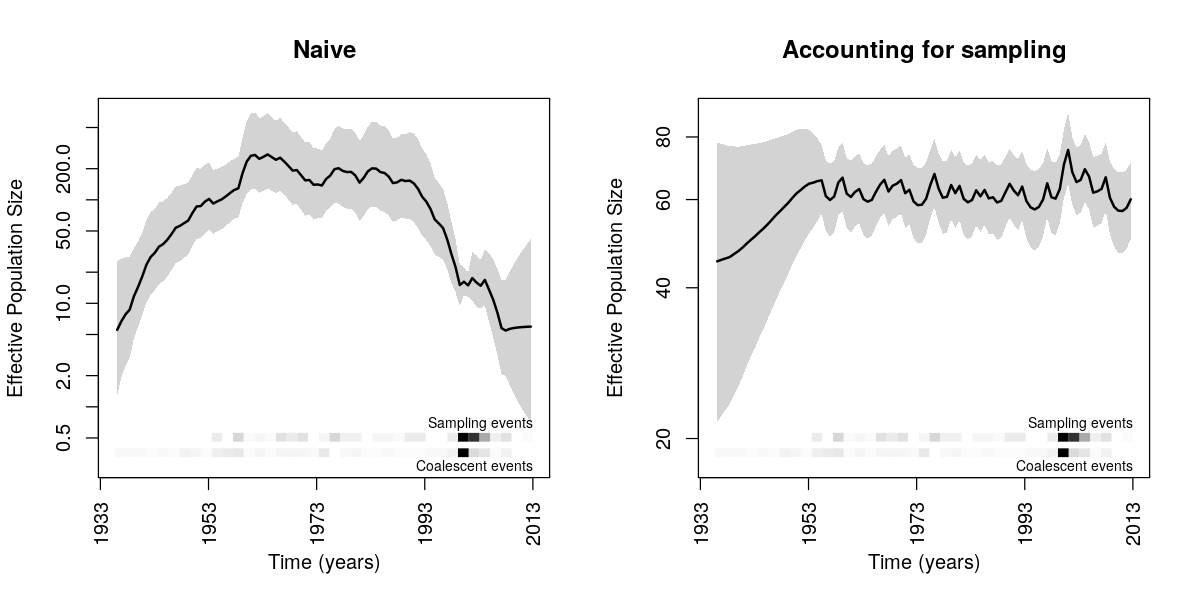

In [13]:
plot_reconstructions(reconstructions.A[[1]], times = tt.A)

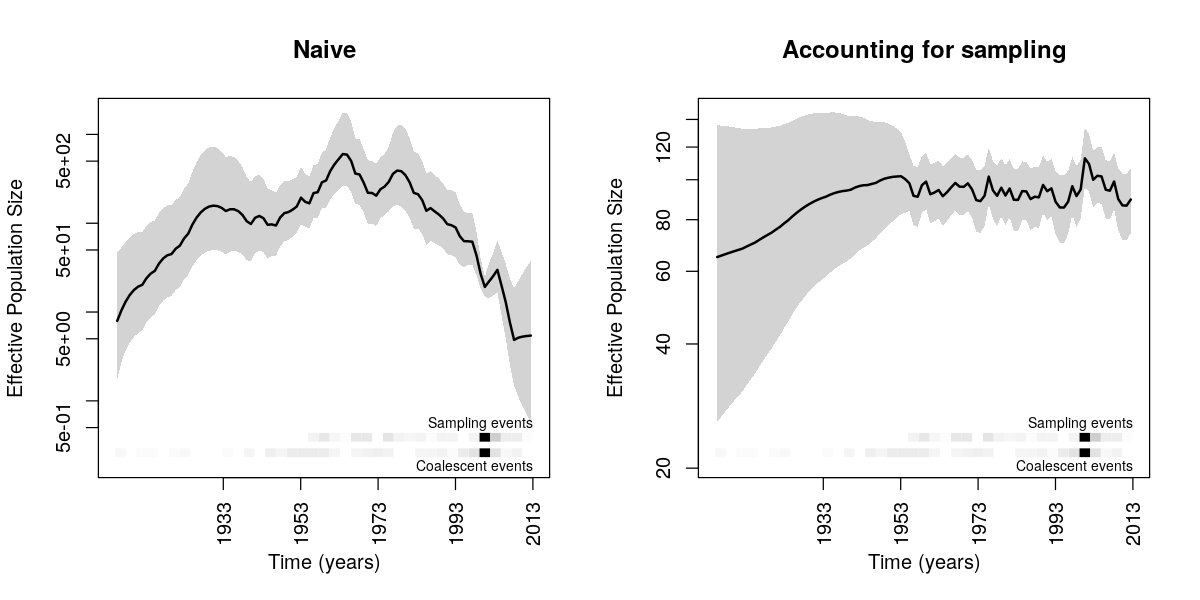

In [14]:
plot_reconstructions(reconstructions.A[[2]], times = tt.A)

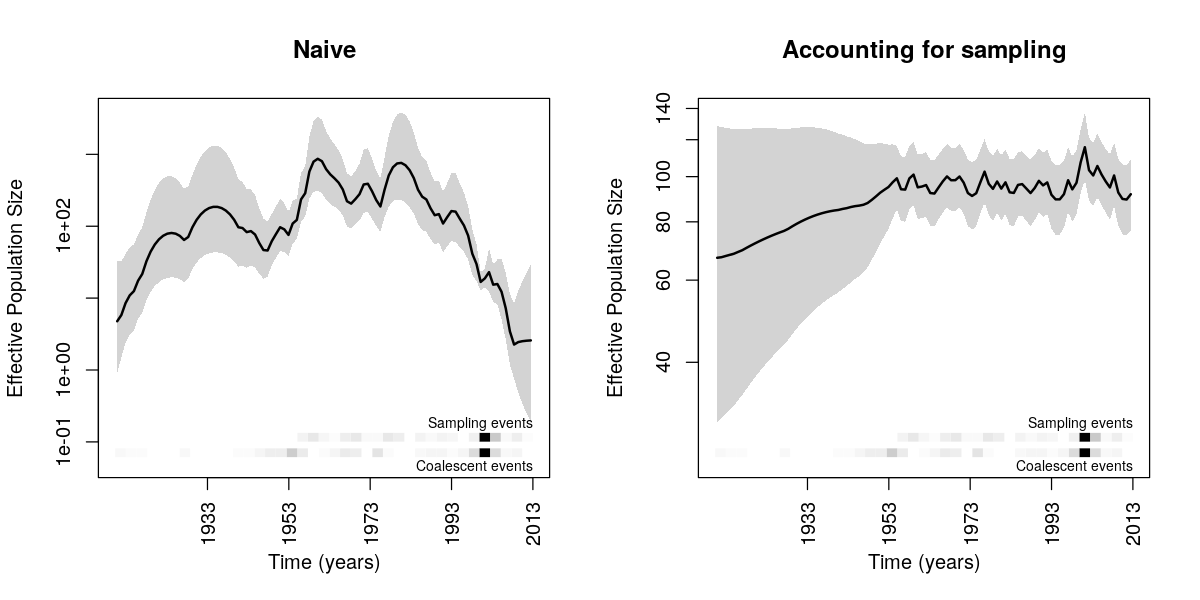

In [15]:
plot_reconstructions(reconstructions.A[[3]], times = tt.A)

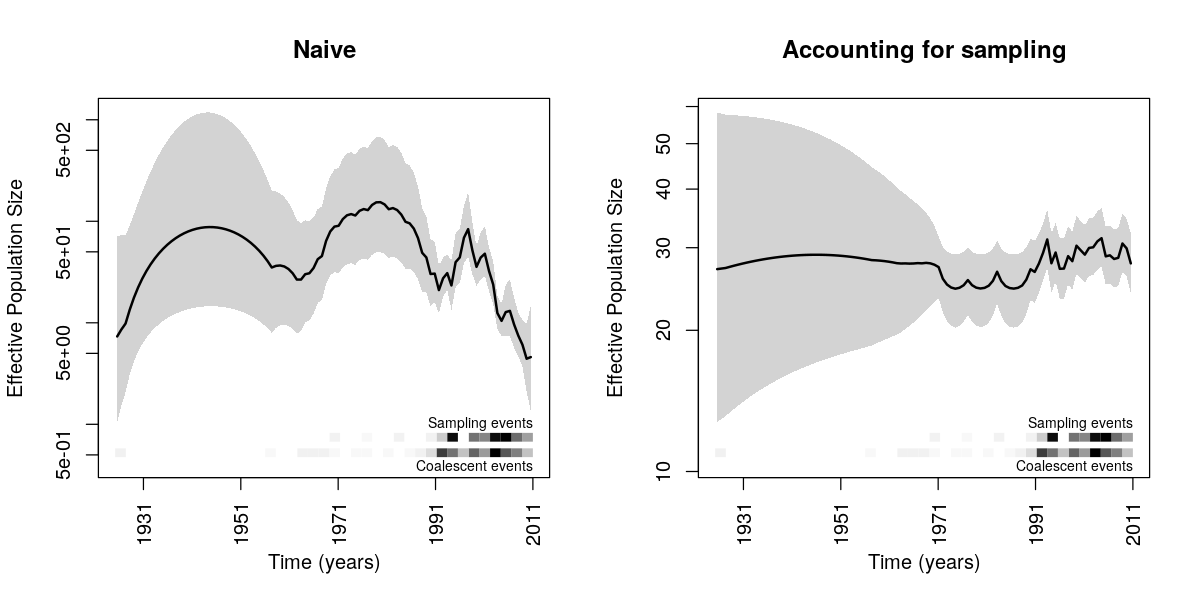

In [16]:
plot_reconstructions(reconstructions.O[[1]], times = tt.O)

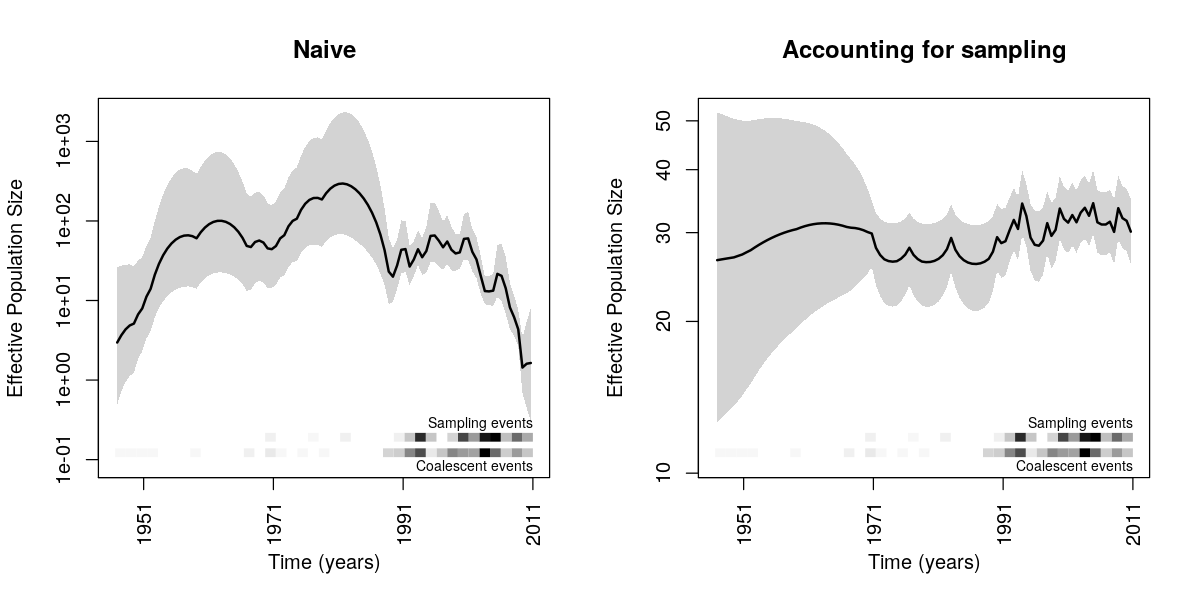

In [17]:
plot_reconstructions(reconstructions.O[[2]], times = tt.O)

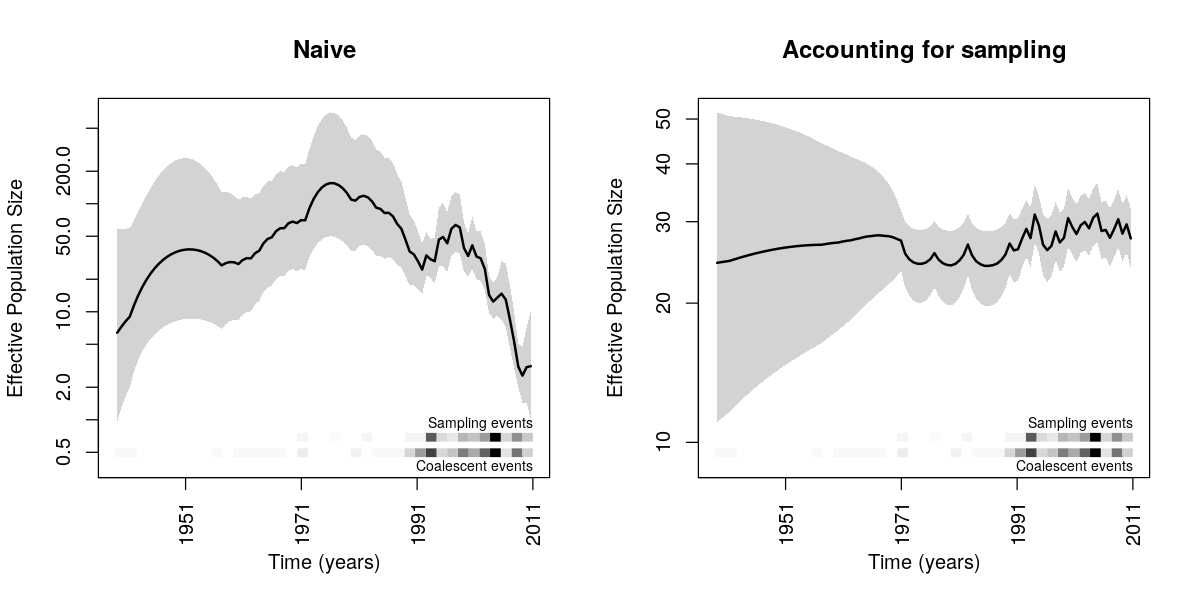

In [18]:
plot_reconstructions(reconstructions.O[[3]], times = tt.O)

In [19]:
plot_reconstructions_overlay <- function(recons, times){
    plot_BNPR(recons$naive, xlab = "Time (years)", axlabs = times, col = "green")
    plot_BNPR(recons$preferential, xlab = "Time (years)", axlabs = times, col = "purple", newplot = FALSE)    
}

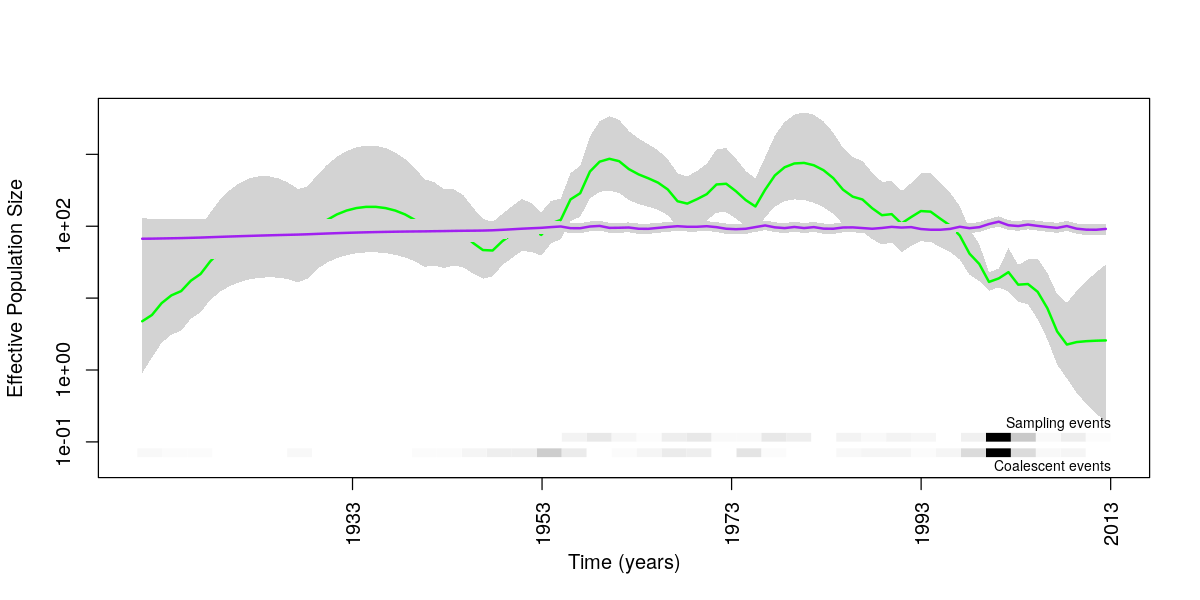

In [20]:
plot_reconstructions_overlay(reconstructions.A[[3]], times = tt.A)

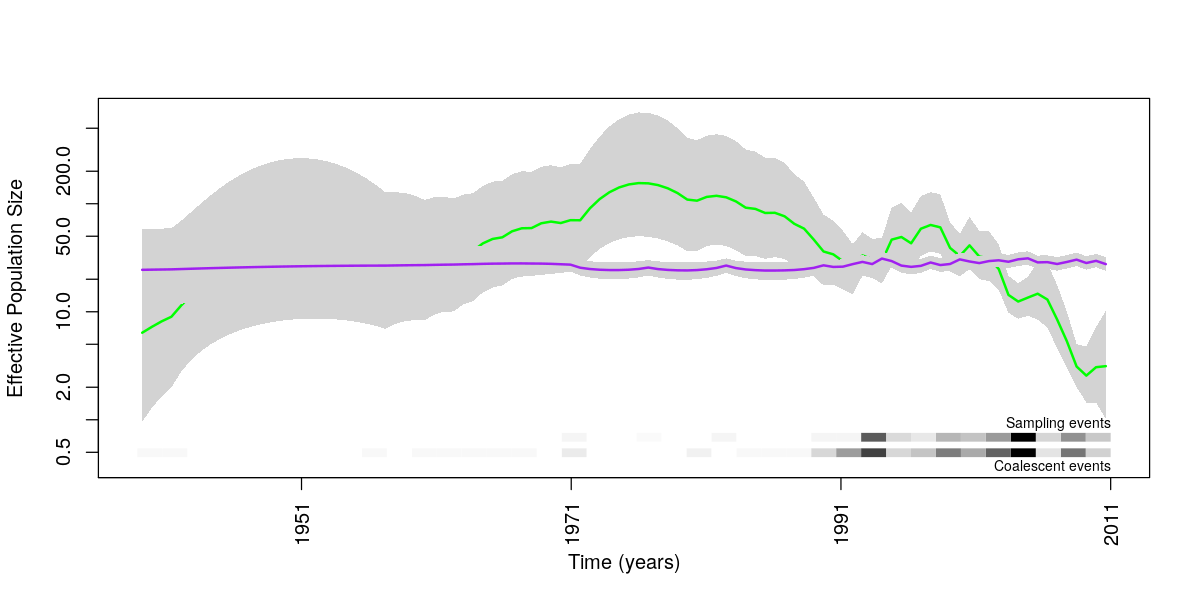

In [21]:
plot_reconstructions_overlay(reconstructions.O[[3]], times = tt.O)